rerun on 2021-12-07 after correcting for salinity of media samples

In [1]:
import pandas as pd
from pandas import DataFrame
import os
import os.path as op
import sys
import glob
import csv
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()

os.chdir('/mnt/scgc/simon/microg2p/analyses/RNA_16S_analysis/')
outdir=('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/rRNA_recruitment/')
images=('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/')

In [2]:
columns=['contig', 'length', 'num_reads_aligned', 'unaligned_reads']
RNA190709=pd.read_csv("sorted/All_190709_GoM_RNA_seq_bbmerge_readsno_MTSTto_GoM_16S_SAGs_SSU_mapped_sorted_recruited_only_sorted.csv", names=columns, skiprows=1)
RNA190402=pd.read_csv("sorted/All_190402_GoM_RNA_seq_bbmerge_readsno_MTSTto_GoM_16S_SAGs_SSU_mapped_sorted_recruited_only_sorted.csv", names=columns, skiprows=1)
RNA181030=pd.read_csv("sorted/All_181030_GoM_RNA_seq_bbmerge_readsno_MTSTto_GoM_16S_SAGs_SSU_mapped_sorted_recruited_only_sorted.csv", names=columns, skiprows=1)
RNA171102=pd.read_csv("sorted/All_171102_GoM_RNA_seq_bbmerge_readsno_MTSTto_GoM_16S_SAGs_SSU_mapped_sorted_recruited_only_sorted.csv", names=columns, skiprows=1)

RNA190709[["SAG"]]=RNA190709['contig'].str[:10]
RNA190402[["SAG"]]=RNA190402['contig'].str[:10]
RNA181030[["SAG"]]=RNA181030['contig'].str[:10]
RNA171102[["SAG"]]=RNA171102['contig'].str[:10]

RNA190709['SAG']=RNA190709['SAG'].astype(str)

RNA190709.head()
RNA190709.dtypes
RNA190709.SAG.nunique

<bound method IndexOpsMixin.nunique of 0       AH-548-O22
1       AH-141-A22
2       AH-141-A13
3       AH-779-K13
4       AH-141-B22
           ...    
1184    AH-793-C20
1185    AH-793-F09
1186    AH-795-C19
1187    AH-795-N21
1188             *
Name: SAG, Length: 1189, dtype: object>

In [3]:

GEN_fields=['name', 'GTDB_classification']
GEN=pd.read_csv("/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv", usecols=GEN_fields)

GEN=GEN.rename(columns={'name':'SAG','GTDB_classification':'Genus'})
GEN['SAG']=GEN['SAG'].astype(str)
GEN.head(10)


,SAG,Genus
0,AH-135-A01,Pelagibacter
1,AH-135-A02,Hel1-33-131
2,AH-135-A03,IMCC9063
3,AH-135-A04,Thioglobus
4,AH-135-A05,SCGC-AAA076-P13
5,AH-135-A06,Unclassified
6,AH-135-A07,Unclassified
7,AH-135-A08,UBA10364
8,AH-135-A09,Unclassified
9,AH-135-A10,SGZJ01


In [4]:
RNA190709_GEN=pd.merge(RNA190709, GEN, how='left', on='SAG')
RNA190709_GEN['date']=190709
RNA190402_GEN=pd.merge(RNA190402, GEN, how='left', on='SAG')
RNA190402_GEN['date']=190402
RNA181030_GEN=pd.merge(RNA181030, GEN, how='left', on='SAG')
RNA181030_GEN['date']=181030
RNA171102_GEN=pd.merge(RNA171102, GEN, how='left', on='SAG')
RNA171102_GEN['date']=171102

# Number of reads per GEN per sample. I need to divide 
RNAreads1907=pd.pivot_table(RNA190709_GEN, index='date', columns='Genus', values='num_reads_aligned', aggfunc=np.sum)
RNAreads1904=pd.pivot_table(RNA190402_GEN, index='date', columns='Genus', values='num_reads_aligned', aggfunc=np.sum)
RNAreads1810=pd.pivot_table(RNA181030_GEN, index='date', columns='Genus', values='num_reads_aligned', aggfunc=np.sum)
RNAreads1711=pd.pivot_table(RNA171102_GEN, index='date', columns='Genus', values='num_reads_aligned', aggfunc=np.sum)

RNA_16Sreads=pd.concat([RNAreads1907,RNAreads1904,RNAreads1810,RNAreads1711])
RNA_16Sreads

Genus,AAA164-E04,AAA536-G10,AG-337-I02,AG-422-B15,ASP10-02a,Akkermansiaceae,Algibacter_B,Amylibacter,Arctic95D-9,Ascidiaceihabitans,...,UBA7434,UBA7446,UBA8649,UBA868,UBA9145,UBA9320,UBA952,UBA9926,Unclassified,Winogradskyella
date,,,,,,,,,,,,,,,,,,,,,
190709,674,86692,621,3687,46972,19551,7918,268089,14126,13965,...,58300,4976,1167,230,8024,14589,33194,204150,276737,929
190402,140,163727,1965,20935,219109,38460,42539,911566,149,70711,...,2460,142,163,431,25400,32381,5079,109676,166257,248
181030,27857,184727,76340,4393,5903,8961,3716,278359,13885,18563,...,6051,3191,1405,24176,30544,13026,53752,149243,474644,1158
171102,16530,177770,13146,2031,7829,48502,5416,544005,2081,34105,...,55899,8991,1285,6498,16534,18155,94439,226602,728798,3034


In [5]:
#Read based conversion to calculate the number of copies of different RNA molecules
#These numbers came from a file on my computer and were hard calculated by me
#Users/jmunson-mcgee/Desktop/RNA_misc/MTST_standard_calculations.xlsx 
#Multiply the number of reads mapping to a transcript in a library this value to get the number of transcripts per ml. 

conversion171102=210.76
conversion181030=67.535
conversion190402=103.615
conversion190709=179.125

RNAcopies_perml=RNA_16Sreads.copy()
RNAcopies_perml.loc[190709]=RNAcopies_perml.loc[190709]*conversion190709
RNAcopies_perml.loc[190402]=RNAcopies_perml.loc[190402]*conversion190402
RNAcopies_perml.loc[181030]=RNAcopies_perml.loc[181030]*conversion181030
RNAcopies_perml.loc[171102]=RNAcopies_perml.loc[171102]*conversion190709


RNAcopies_perml.to_csv(outdir+'16S_transcripts_perGenus_per_ml.csv')
RNAcopies_perml=RNAcopies_perml.T


In [6]:

RNAcopies_per_ml_melt=pd.melt(RNAcopies_perml, ignore_index=False)
RNAcopies_per_ml_melt=RNAcopies_per_ml_melt.rename(columns={'value':'16S_transcripts_per_ml'})

RNAcopies_per_ml_melt.to_csv(outdir+'16S_transcripts_perGenus_per_ml_melted.csv')
RNAcopies_per_ml_melt


,date,16S_transcripts_per_ml
Genus,,
AAA164-E04,190709,1.207302e+05
AAA536-G10,190709,1.552870e+07
AG-337-I02,190709,1.112366e+05
AG-422-B15,190709,6.604339e+05
ASP10-02a,190709,8.413860e+06
...,...,...
UBA9320,171102,3.252014e+06
UBA952,171102,1.691639e+07
UBA9926,171102,4.059008e+07


### I have modified the above so that it produces the a csv file that includes the unclustered SAGs. If I am interested in  recreating the images/files that are produced below I will have to either repeat the above without the unclustered SAGs or modify the code below so that it includes the Unclustered SAGs.


In [7]:
cellsperml=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GoM_Metagenome_analysis/GoM_metagenome_calculated_Genus_cells_per_ml.csv')
cols=[0,8,7,6,5]
cellsperml=cellsperml[cellsperml.columns[cols]]
cellsperml=cellsperml.rename(columns={'genus':'Genus', '20171102_genome_size_normalized_metagenome_cells/ml':'171102_cells',
                                     '20181030_genome_size_normalized_metagenome_cells/ml':'181030_cells',
                                      '20190402_genome_size_normalized_metagenome_cells/ml':'190402_cells',
                                      '20190709_genome_size_normalized_metagenome_cells/ml':'190709_cells',})
cellsperml=cellsperml.T
cellsperml.columns = cellsperml.iloc[0]
cellsperml=cellsperml.drop(cellsperml.index[[0]])
cellsperml=cellsperml.reset_index()
cellsperml=cellsperml.rename(columns={'index':'date'})
cellsperml=cellsperml.set_index('date')
cellsperml=cellsperml.T
cellsperml


date,190709_cells,190402_cells,181030_cells,171102_cells
Genus,,,,
AAA164-E04,857.677,369.343,1916.46,842.194
AAA536-G10,17721.6,14403.3,16915.5,17472.8
AG-337-I02,1002.76,1075.34,9857.22,2227.34
AG-414-E02,128.286,401.158,438.765,125.192
AG-422-B15,6736.37,13707.6,3313.16,1880.68
...,...,...,...,...
Verrucomicrobiales,280.891,54.1797,397.482,265.899
Vibrio,964.926,533.775,620.661,622.266
Vicingaceae,5084.19,7151.27,470.155,782.481


In [8]:
RNAcopies_per_cell=RNAcopies_perml.merge(cellsperml, on='Genus', how='left')
                                         
RNAcopies_per_cell['16S_transcripts_per_cell_190709']=RNAcopies_per_cell[190709]/RNAcopies_per_cell['190709_cells']
RNAcopies_per_cell['16S_transcripts_per_cell_190402']=RNAcopies_per_cell[190402]/RNAcopies_per_cell['190402_cells'] 
RNAcopies_per_cell['16S_transcripts_per_cell_181030']=RNAcopies_per_cell[181030]/RNAcopies_per_cell['181030_cells'] 
RNAcopies_per_cell['16S_transcripts_per_cell_171102']=RNAcopies_per_cell[171102]/RNAcopies_per_cell['171102_cells']


cols=[8,9,10,11]
RNAcopies_per_cell=RNAcopies_per_cell[RNAcopies_per_cell.columns[cols]]
RNAcopies_per_cell.to_csv(outdir+'16S_rRNA_copies_per_cell_per_Genus.csv')
RNAcopies_per_cell=RNAcopies_per_cell.reset_index()
RNAcopies_per_cell=RNAcopies_per_cell.rename(columns={'index':'Genus'})
RNAcopies_per_cell

RNAcopiesmelt=pd.melt(RNAcopies_per_cell, id_vars='Genus')
RNAcopiesmelt=RNAcopiesmelt.rename(columns={'value':'16S_copies_per_cell'})
RNAcopiesmelt['date']=RNAcopiesmelt['date'].str[-6:]
RNAcopiesmelt.to_csv(outdir+'16S_rRNA_copies_per_cell_per_Genus_melted.csv')

RNAcopiesmelt=RNAcopiesmelt.dropna()

RNAcopiesmelt['16S_copies_per_cell']=RNAcopiesmelt['16S_copies_per_cell'].astype(str).astype(float)

RNAcopiesmelt

,Genus,date,16S_copies_per_cell
0,AAA164-E04,190709,140.764254
1,AAA536-G10,190709,876.260279
2,AG-337-I02,190709,110.930849
3,AG-422-B15,190709,98.039999
4,ASP10-02a,190709,867.171322
...,...,...,...
443,UBA9320,171102,242.523706
444,UBA952,171102,433.627056
445,UBA9926,171102,2430.373003
446,Unclassified,171102,565.254946


In [9]:
O2consumption=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/GoM_mg_abundance_weighted_average_O2_consumption_per_cell.csv', index_col=0)
O2consumption
O2meanmelt=O2consumption.melt(id_vars='genus')
O2meanmelt=O2meanmelt.rename(columns={'value':'weighted_avg_O2_consumed', 'variable':'date'})
O2meanmelt=O2meanmelt.rename(columns={'genus':'Genus'})
O2meanmelt['date']=O2meanmelt['date'].str[:6]

O2meanmelt=O2meanmelt.dropna()
O2meanmelt

,Genus,date,weighted_avg_O2_consumed
0,AAA164-E04,171102,0.002330
1,AAA536-G10,171102,0.002330
2,AG-337-I02,171102,0.002330
3,AG-414-E02,171102,0.002330
4,AG-422-B15,171102,0.002330
...,...,...,...
663,Verrucomicrobiales,190709,0.001999
664,Vibrio,190709,0.001999
665,Vicingaceae,190709,0.001999
666,Winogradskyella,190709,0.001999


In [10]:
RNAtbl=pd.merge(RNAcopiesmelt, O2meanmelt, how='left', on=['date','Genus'])
RNAtbl['log_weighted_avg_O2_consumed']=np.log10(RNAtbl['weighted_avg_O2_consumed'])

RNAtbl['log_16S_copies_per_cell']=np.log10(RNAtbl['16S_copies_per_cell'])

RNAtbl=RNAtbl.dropna(subset=['16S_copies_per_cell', 'weighted_avg_O2_consumed'], how='any')
RNAtbl

,Genus,date,16S_copies_per_cell,weighted_avg_O2_consumed,log_weighted_avg_O2_consumed,log_16S_copies_per_cell
0,AAA164-E04,190709,140.764254,0.001999,-2.699231,2.148492
1,AAA536-G10,190709,876.260279,0.001999,-2.699231,2.942633
2,AG-337-I02,190709,110.930849,0.001999,-2.699231,2.045052
3,AG-422-B15,190709,98.039999,0.001999,-2.699231,1.991403
4,ASP10-02a,190709,867.171322,0.001999,-2.699231,2.938105
...,...,...,...,...,...,...
375,UBA9320,171102,242.523706,0.002330,-2.632640,2.384754
376,UBA952,171102,433.627056,0.002330,-2.632640,2.637116
377,UBA9926,171102,2430.373003,0.011640,-1.934052,3.385673
378,Unclassified,171102,565.254946,23.337911,1.368062,2.752244


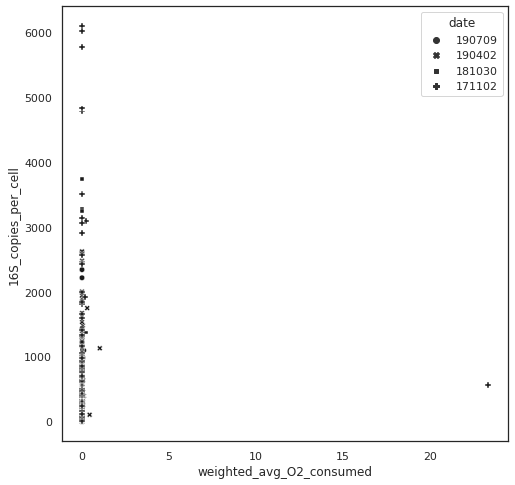

In [11]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("white")
sns.color_palette("viridis")

RNA_scatter=sns.scatterplot(data=RNAtbl, x='weighted_avg_O2_consumed', y='16S_copies_per_cell', 
                            style='date', color='k', s=30)

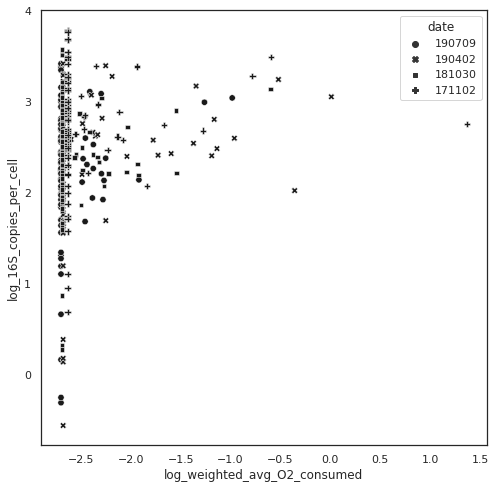

In [12]:
RNA_log_scatter=sns.scatterplot(data=RNAtbl, x='log_weighted_avg_O2_consumed', y='log_16S_copies_per_cell', 
                            style='date', color='k', s=40)
#plt.savefig(images+'16S rRNA_transcripts_vs_O2consumption_per_cell.pdf')

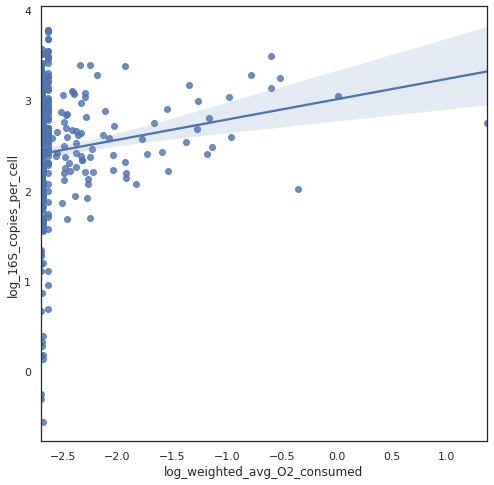

In [13]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("white")
RNA_log_reg=sns.regplot(data=RNAtbl, x='log_weighted_avg_O2_consumed', y='log_16S_copies_per_cell', fit_reg=True)


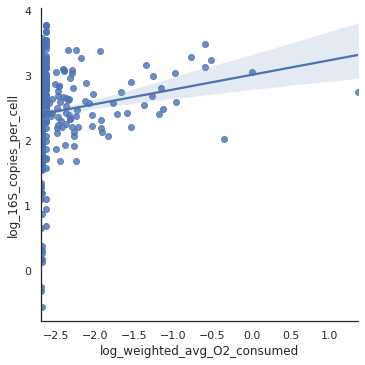

In [14]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("white")
RNA_log_lm=sns.lmplot(data=RNAtbl, x='log_weighted_avg_O2_consumed', y='log_16S_copies_per_cell', fit_reg=True)

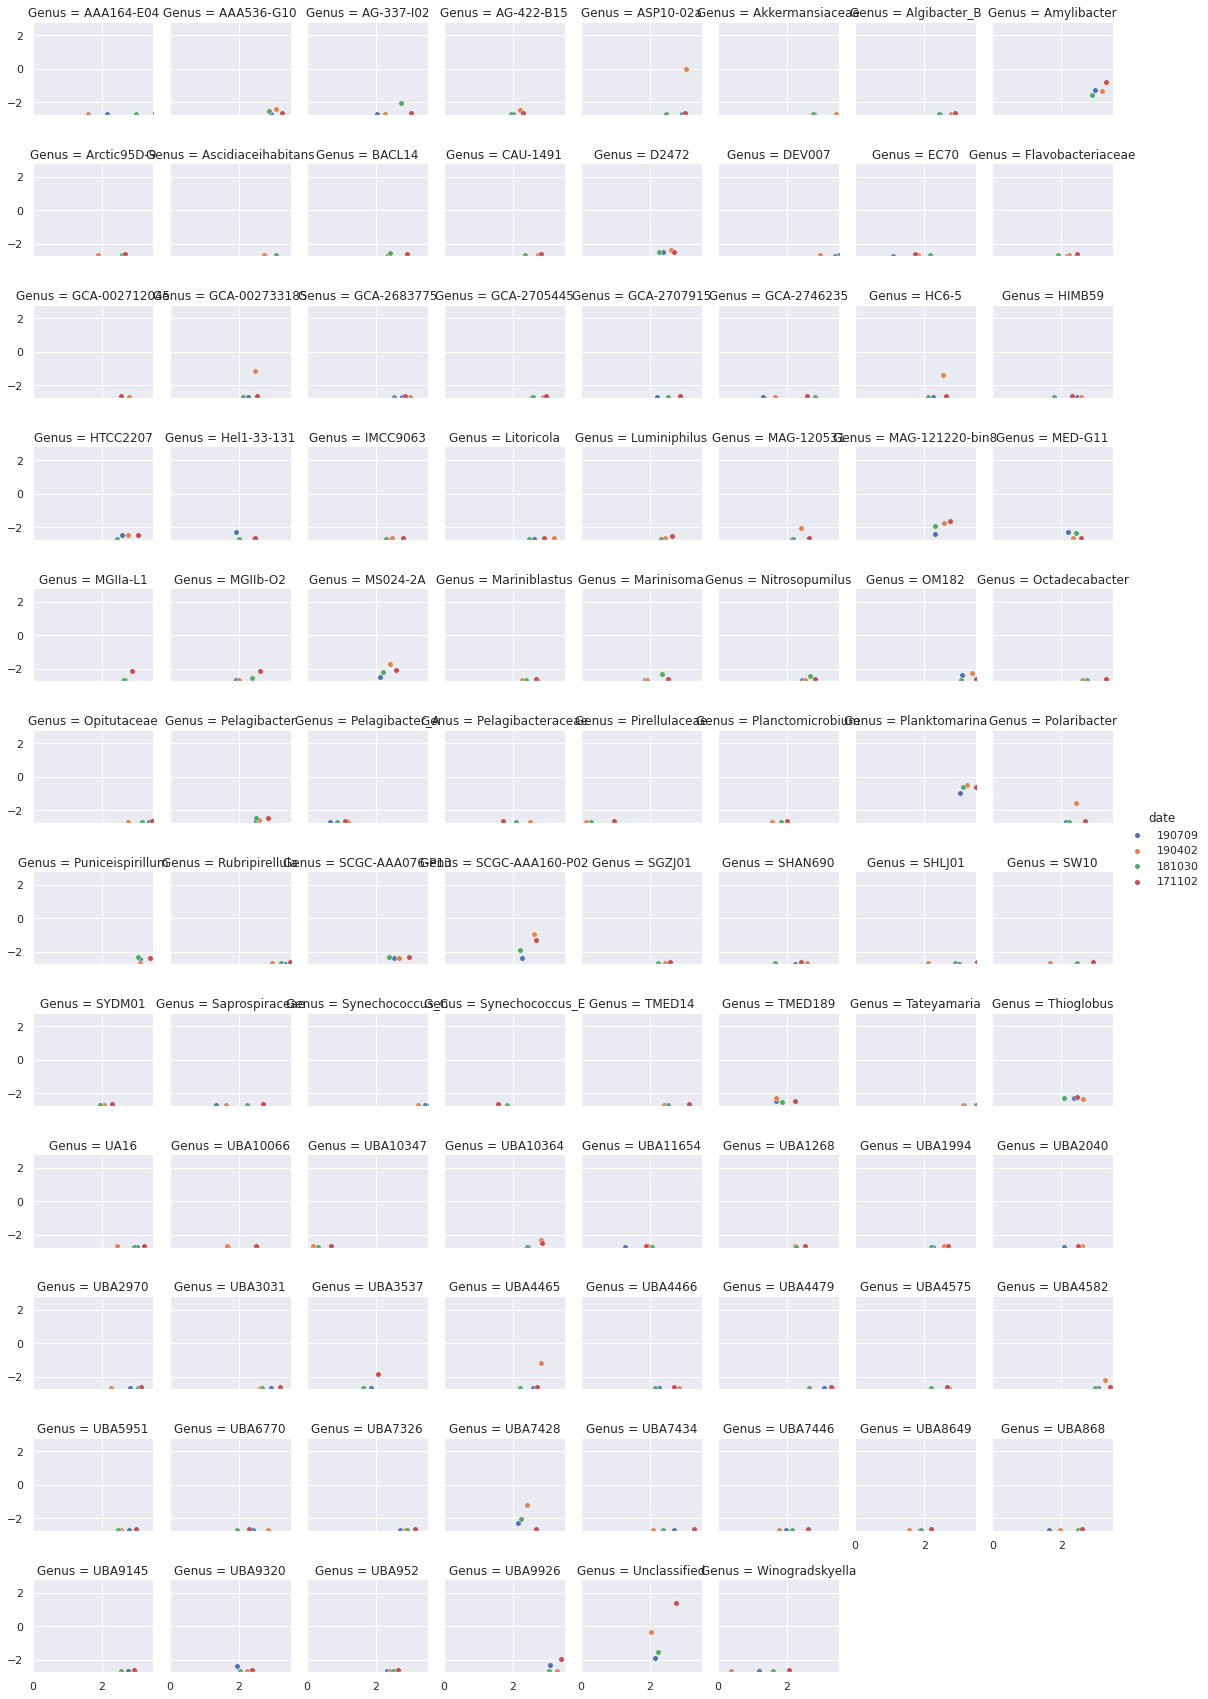

In [18]:
sns.set(rc={'figure.figsize':(20,20)})
grid=sns.FacetGrid(RNAtbl, col='Genus', col_wrap=8, height=2, ylim=(-2.75, 2.75), xlim=(0,3.5), hue='date',
                  margin_titles=False)
grid.map(sns.scatterplot,'log_16S_copies_per_cell', 'log_weighted_avg_O2_consumed', s=30)
grid.set(xlabel='', ylabel='')
grid.add_legend()
grid.set_axis_labels('', '')
plt.savefig(images+'16S_rRNA_transcripts_vs_O2consumption_per_cell_per_Genus.pdf')